### RFM Analysis on Transaction Dataset for the purpose of Customer Segmentation

### Steps involved are as follows:
* Data Preparation
* Missing value treatement
* Data Visualization
* Create the RFM table
* Validating the RFM table

### Data Preparation

In [2]:
#Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load Dataset - Data Understanding
transactions = pd.read_excel("C:/Users/ezeki/OneDrive/Desktop/Transaction.xlsx")

In [4]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
# Summary Statistics
transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [6]:
# General Statistics
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [7]:
# Checking for missing values
transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

Here we have missing values in 7 variables summarized below
* 4 Categorical variable: [ brand, product_line, product_class, product_size, list_price]
* 3 Continuous variable: [Online_order, standard_cost, product_first_sold_date]

### Missing Value Treatment

In [8]:
# Missing value treatment for categorical variables using mode imputation
from scipy.stats import mode
var_to_impute = ['brand', 'product_line', 'product_class', 'product_size']
for var in var_to_impute:
    transactions[var].fillna(mode(transactions[var]).mode[0], inplace=True)

In [9]:
# Missing value treatment for continuous variables with mean imputation
transactions['online_order'].fillna(transactions['online_order'].mean(),inplace=True)
transactions['standard_cost'].fillna(value=np.round(transactions['standard_cost'].mean(),decimals=2), inplace=True)
transactions['product_first_sold_date'].fillna(value=np.round(transactions['product_first_sold_date'].mean(),decimals=2), inplace=True)

In [10]:
# Checking to see if the missing value has been treated
transactions.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

### Data Visualization

Text(0.5, 1.0, 'Brands first sold date')

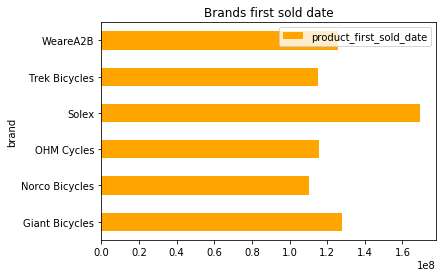

In [13]:
#Bar PLots
transactions[['brand','product_first_sold_date']].groupby('brand').sum().plot.barh(color='orange')
plt.title('Brands first sold date')

From the above plot it is noticed that the Brand Solex sold highest amongst the other five (5) brands.

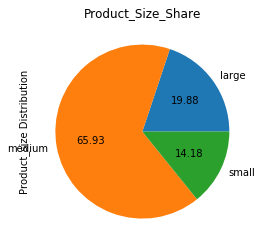

In [15]:
#Pie charts on product sizes
product_size_df = transactions.groupby('product_size').size()
product_size_df.name = 'Product_size Distribution'
product_size_df.plot.pie(autopct='%.2f')
plt.title('Product_Size_Share')
plt.show()

Seeing from the above pie-chart the product size with the largest share is the medium size products

In [16]:
#Create the RFM Table
#Since recency is calculated for a point in time and 
#the Tableau Super Store dataset last order date is Dec 31 2014, 
#that is the date we will use to calculate recency.
import datetime as dt
NOW = dt.datetime(2017,12,30)

In [17]:
#Make the date_placed column datetime
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

### Creating the RFM Table

In [18]:
rfmTable = transactions.groupby('customer_id').agg({'transaction_date': lambda x: (NOW - x.max()).days,#Recency
                                                   'transaction_id': lambda x: len(x), #Frequency
                                                   'product_first_sold_date': lambda x: x.sum()}) #Monetary Value

rfmTable['transaction_date'] = rfmTable['transaction_date'].astype (int)
rfmTable.rename(columns={'transaction_date': 'recency',
                        'transaction_id': 'frequency',
                        'product_first_sold_date': 'monetary_value'}, inplace=True)

### Validating the RFM Table

In [19]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7,11,410455.0
2,128,3,116327.0
3,102,8,314802.0
4,195,2,72017.0
5,16,6,224166.0


In [21]:
Customer1 = transactions[transactions['brand']=='Solex']
Customer1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0
36,37,14,1040,2017-01-09,0.0,Approved,Solex,Standard,high,large,1842.92,1105.75,34996.0
37,38,2,2916,2017-12-06,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,33549.0
41,42,79,3398,2017-05-14,0.0,Approved,Solex,Touring,medium,large,2083.94,675.03,41533.0


In [22]:
(NOW - dt.datetime(2017,12,30)).days==11

False

### Determining RFM Quartiles

In [23]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])

In [24]:
quantiles

,recency,frequency,monetary_value
0.25,17.0,4.0,153321.250
0.50,44.0,6.0,218121.500
0.75,85.0,7.0,271670.945


##### Send quantiles to a dictionary, to be easier for use.

In [25]:
quantiles = quantiles.to_dict()

In [26]:
quantiles

{'recency': {0.25: 17.0, 0.5: 44.0, 0.75: 85.0},
 'frequency': {0.25: 4.0, 0.5: 6.0, 0.75: 7.0},
 'monetary_value': {0.25: 153321.25, 0.5: 218121.5, 0.75: 271670.945}}

### Creating the RFM segmentation table

In [27]:
rfmSegmentation = rfmTable

We create two classes for the RFM segmentation since, being high recency is bad, while high frequency and monetary value is good.

In [28]:
#Arguments (x = value, p = recency, moentary_value, frequency, k = quantiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else: 
        return 4
    

#Arguments (x = value, p = recency, moentary_value, frequency, k = quantiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [29]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency', quantiles))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args= ('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value', quantiles,))

In [30]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [31]:
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
1,7,11,410455.0,1,1,1,111
2,128,3,116327.0,4,4,4,444
3,102,8,314802.0,4,1,1,411
4,195,2,72017.0,4,4,4,444
5,16,6,224166.0,1,3,2,132


In [32]:
#Uncomment any of the following lines to: copy data to clipboard or save it to a CSV file.
rfmSegmentation.to_clipboard()
rfmSegmentation.to_csv('rfm-table.csv', sep=',')

In [36]:
rfmSegmentation[rfmSegmentation['RFMClass']=='122'].head()#.sort('monetary_value', ascending=False)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
52,4,7,271008.78,1,2,2,122
56,2,7,260748.00,1,2,2,122
124,2,7,266194.00,1,2,2,122
180,11,7,266924.00,1,2,2,122
182,13,7,265062.00,1,2,2,122


### End